<a href="https://colab.research.google.com/github/srv96/AI-ML-TensorFlow/blob/main/Custom_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import tensorflow as tf

In [132]:
import numpy as np
import matplotlib.pyplot as plt

In [133]:
class LinearRegression(tf.keras.Model):
    def __init__(self , num_inputs , num_outputs):
      super(LinearRegression, self).__init__()
      self.W = tf.Variable(
          tf.random_normal_initializer()((num_inputs,num_outputs))
      )
      self.b = tf.Variable(tf.zeros(num_outputs))
      self.params = [self.W,self.b]

    def call( self,inputs):
      return tf.matmul(inputs,self.W) + self.b

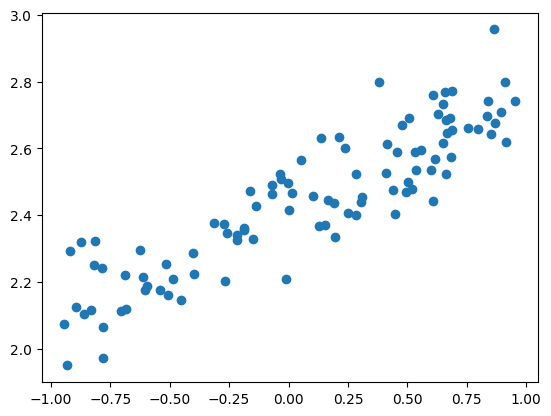

In [134]:
N = 100
D = 1
K = 1
X = np.random.random((N,D)) * 2 - 1
w = np.random.randn(D,K)
b = np.random.randn()

Y = X.dot(w) + b + np.random.randn(N,1) * 0.1

plt.scatter(X,Y)
plt.show()

In [135]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [136]:
def get_loss(model, inputs, targets):
  predictions = model(inputs)
  error = targets - predictions
  loss = tf.reduce_mean(tf.square(error))
  return loss

In [137]:
def get_gradient(model , inputs , targets):
  with tf.GradientTape() as tape:
    loss_value = get_loss(model,inputs,targets)

  return tape.gradient(loss_value , model.params)

In [138]:
model = LinearRegression(D,K)
print("Intial params : \n")
print(model.W)
print(model.b)

Intial params : 

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.03313044]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [139]:
losses = []

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

epochs = 100
for i in range(epochs) :
  grads = get_gradient(model, X, Y)
  optimizer.apply_gradients(zip(grads,model.params))

  loss = get_loss(model,X,Y)
  losses.append(loss)

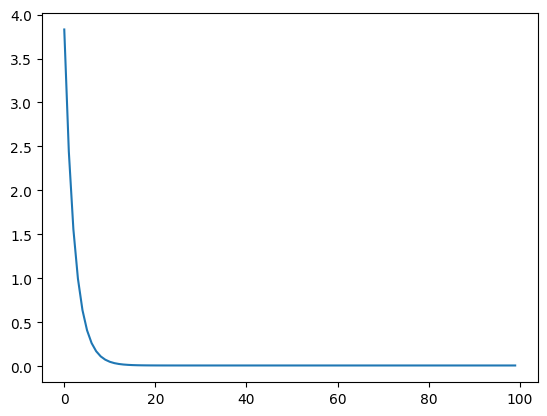

In [140]:
plt.plot(losses)
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


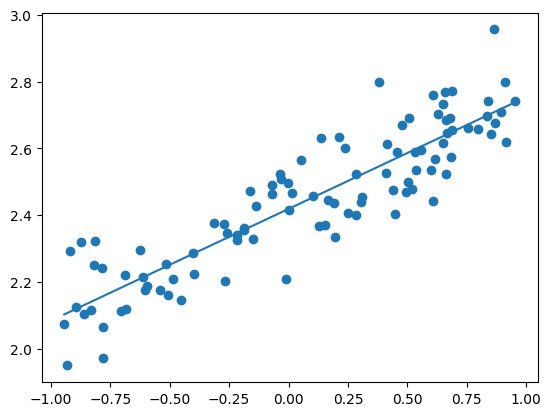

In [141]:
x_axis = np.linspace(X.min(), X.max(), 100)
y_axis = model.predict(x_axis.reshape(-1,1)).flatten()

plt.scatter(X,Y)
plt.plot(x_axis,y_axis)
plt.show()

In [142]:
print("predicted param")
print(model.W)
print(model.b)

predicted param
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.3351408]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.4186242], dtype=float32)>


In [143]:
print("actual param")
print(w , b)

actual param
[[0.33464869]] 2.42173730730338
